# **Análise Preditiva e Vantagem Comparativa**
Aluna : Joyce Alves Durão

**Trabalho final - Análise de Dados Financeiros**


### **Instalçao de pacotes**

In [1]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 132.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 161.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 153.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 149.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 153.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 197.1 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting

In [2]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


### **Importando pacotes**

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### **Baixando dados de site com ativos financeiros**

In [5]:
import requests
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [6]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

           EMPRESA  CÓDIGO                                   SETOR  \
0               3M  MMMC34                 Indústria diversificada   
1         AB INBEV  ABUD34                                 Bebidas   
2          ABB LTD  A1BB34                              Industrial   
3           ABBOTT  ABTT34                           Farmacêuticos   
4           ABBVIE  ABBV34          Medicamentos e Outros Produtos   
..             ...     ...                                     ...   
703  RAYTHEON TECH  RYTT34                              Industrial   
704   SCHLUMBERGER  SLBG34  Equipamentos e Serviços de Combustível   
705        TIFFANY  TIFF34                               Joalheria   
706     US BANCORP  USBC34                  Instituição Financeira   
707         XP INC  XPBR31                              Financeiro   

    PAÍS DE ORIGEM  
0              EUA  
1          Bélgica  
2      Switzerland  
3              EUA  
4              EUA  
..             ...  
703         

### **Escolha dos ativos**

Inicialmente, foram escolhidos preferencialmente os ativos referentes à Indústria Farmacêutica, porém como alguns deles apresentavam dados ausentes em sua série, optou-se por selecionar ativos de outros segmentos também, obtendo assim um conjunto de dados completo.

In [7]:
dados_series = yf.download(["ABTT34.SA","MRCK34.SA","COPH34.SA","EBAY34.SA","PFIZ34.SA","JNJB34.SA","CTGP34.SA","ACNB34.SA","LILY34.SA","CSCO34.SA"], start="2018-01-01", end="2022-01-01")

[*********************100%***********************]  10 of 10 completed


In [8]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

            Adj Close                                                \
            ABTT34.SA    ACNB34.SA  COPH34.SA  CSCO34.SA  CTGP34.SA   
Date                                                                  
2018-01-02  14.645772   473.637390  13.523800  21.656061  32.255417   
2018-01-03  14.769363   467.395569  13.523800  21.813400  32.081947   
2018-01-04  14.707568   467.395569  13.355984  21.816853  32.608948   
2018-01-05  14.738467   467.395569  13.188163  22.065163  32.314995   
2018-01-08  14.738467   479.413483  13.425421  22.296228  32.112404   
...               ...          ...        ...        ...        ...   
2021-12-23  64.583145  2251.896973  32.014404  68.142731  54.476036   
2021-12-27  65.297791  2301.260742  32.526379  68.739380  54.352207   
2021-12-28  64.969971  2306.553223  32.551670  69.028084  54.466515   
2021-12-29  66.317307  2324.939941  32.706528  70.567818  55.057091   
2021-12-30  64.058640  2259.609375  31.722933  67.882904  53.075798   

     

In [9]:
#Selecionando apenas os dados referentes ao preço de fechamento
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 

In [10]:
df.head()

Close                                                          \
            ABTT34.SA   ACNB34.SA  COPH34.SA  CSCO34.SA  CTGP34.SA  EBAY34.SA   
Date                                                                            
2018-01-02  15.800000  508.399994  15.580000  25.299999  40.599998  62.650002   
2018-01-03  15.933333  501.700012  15.580000  25.299999  40.381664  63.599998   
2018-01-04  15.866666  501.700012  15.386666  25.304001  41.044998  63.009998   
2018-01-05  15.900000  501.700012  15.193333  25.591999  40.674999  64.400002   
2018-01-08  15.900000  514.599976  15.466666  25.860001  40.419998  64.699997   

                                                       
            JNJB34.SA LILY34.SA  MRCK34.SA  PFIZ34.SA  
Date                                                   
2018-01-02  30.260000  9.446666  23.511250  29.735001  
2018-01-03  30.400000  9.240000  22.799999  29.695000  
2018-01-04  30.360001  9.243333  23.213751  29.895000  
2018-01-05  30.433332  9.322000  23.086250  29.725000  
2018-01-08  30.633333  9.306666  23.032499  29.590000

**Verificando se as colunas referem-se aos nomes dos ativos:**

In [11]:
df['Close'].columns

Index(['ABTT34.SA', 'ACNB34.SA', 'COPH34.SA', 'CSCO34.SA', 'CTGP34.SA',
       'EBAY34.SA', 'JNJB34.SA', 'LILY34.SA', 'MRCK34.SA', 'PFIZ34.SA'],
      dtype='object')

In [12]:
df['Close']['ABTT34.SA']

Date
2018-01-02    15.800000
2018-01-03    15.933333
2018-01-04    15.866666
2018-01-05    15.900000
2018-01-08    15.900000
                ...    
2021-12-23    65.669998
2021-12-27    66.396667
2021-12-28    66.063332
2021-12-29    67.433334
2021-12-30    65.136665
Name: ABTT34.SA, Length: 989, dtype: float64

In [13]:
selecao = ['ABTT34.SA', 'ACNB34.SA', 'COPH34.SA', 'CSCO34.SA', 'CTGP34.SA',
       'EBAY34.SA', 'JNJB34.SA', 'LILY34.SA', 'MRCK34.SA', 'PFIZ34.SA']

In [14]:
x = np.arange (1,len(df)+1,1)


### **Padronizando os dados**

Padronização dos dados, no caso os valores de fechamento do ativo dentro da série temporal.

In [15]:
def filtro_ativo(ativo):
  df_filtro = df['Close'][ativo]
  return df_filtro

In [16]:
def ativo_nomal(ativo):
  y = filtro_ativo(ativo)
  minimo = np.min(y)
  maximo = np.max(y)
  y = (y- minimo)/(maximo - minimo)
  return y

In [17]:
y = []
for h in selecao:
  ativo = ativo_nomal(h)
  y.append(ativo)

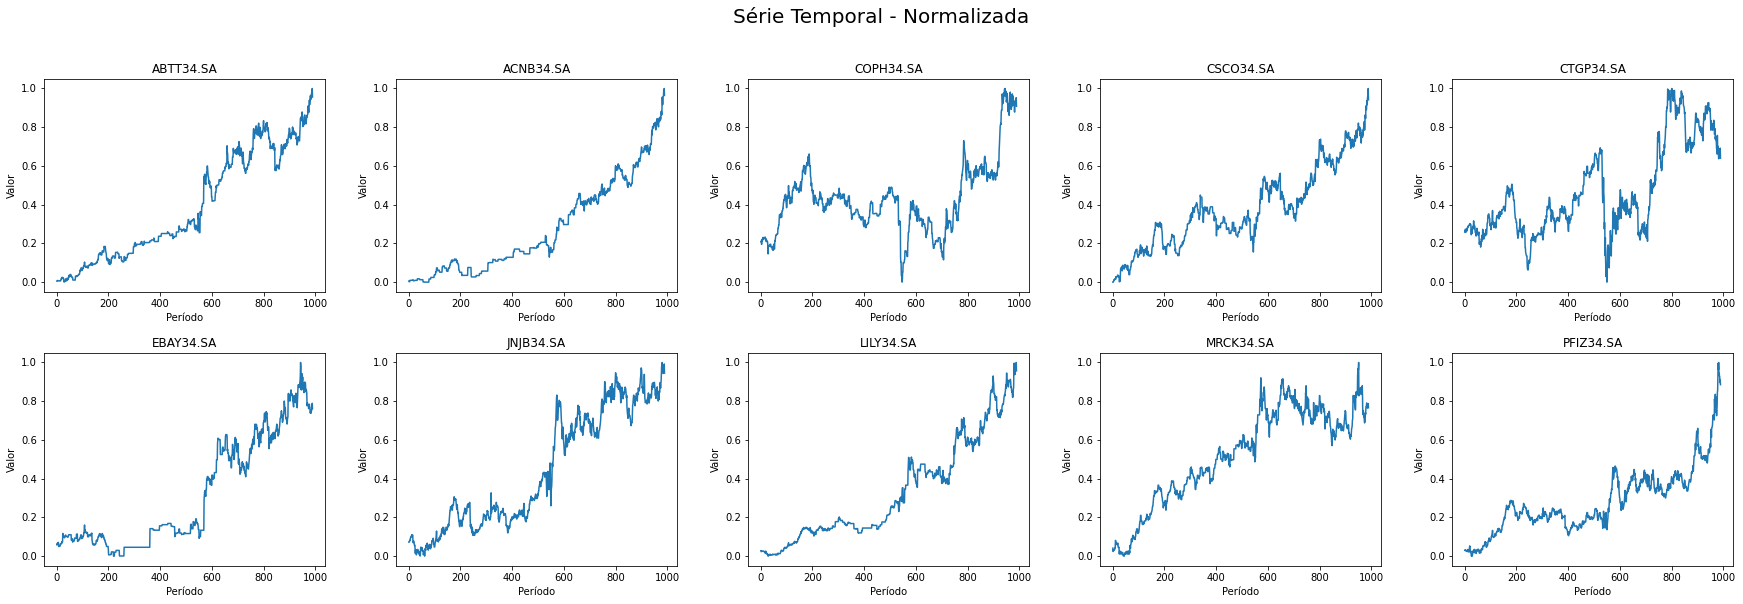

In [18]:
title = "Série Temporal - Normalizada"

fig1, ax = plt.subplots(2,5, figsize = (25,9))
fig1.suptitle(title, y=0.95, fontsize=20)
fig1.tight_layout(pad=4)

cont=0
for t in range(2):
  for r in range(5):
    ax[t][r].plot(x,y[cont])
    ax[t][r].set(xlabel='Período', ylabel='Valor')
    ax[t][r].title.set_text(df['Close'].columns[cont])
    cont = cont+1

### **Preparação do conjunto de treinamento e teste**

In [19]:
selecao

['ABTT34.SA',
 'ACNB34.SA',
 'COPH34.SA',
 'CSCO34.SA',
 'CTGP34.SA',
 'EBAY34.SA',
 'JNJB34.SA',
 'LILY34.SA',
 'MRCK34.SA',
 'PFIZ34.SA']

In [20]:
y

[Date
 2018-01-02    0.005777
 2018-01-03    0.008344
 2018-01-04    0.007060
 2018-01-05    0.007702
 2018-01-08    0.007702
                 ...   
 2021-12-23    0.966046
 2021-12-27    0.980039
 2021-12-28    0.973620
 2021-12-29    1.000000
 2021-12-30    0.955777
 Name: ABTT34.SA, Length: 989, dtype: float64, Date
 2018-01-02    0.005645
 2018-01-03    0.002053
 2018-01-04    0.002053
 2018-01-05    0.002053
 2018-01-08    0.008968
                 ...   
 2021-12-23    0.960198
 2021-12-27    0.987097
 2021-12-28    0.989981
 2021-12-29    1.000000
 2021-12-30    0.964401
 Name: ACNB34.SA, Length: 989, dtype: float64, Date
 2018-01-02    0.210251
 2018-01-03    0.210251
 2018-01-04    0.202667
 2018-01-05    0.195084
 2018-01-08    0.205805
                 ...   
 2021-12-23    0.923640
 2021-12-27    0.944822
 2021-12-28    0.945868
 2021-12-29    0.952275
 2021-12-30    0.908081
 Name: COPH34.SA, Length: 989, dtype: float64, Date
 2018-01-02    0.000000
 2018-01-03    0.00000

Separando 80% da amostra de dados para o treinamento do modelo.

In [21]:
treinos = []
testes = []

for i in range(len(selecao)):
  percentual_treinamento = 0.8
  qtd_treinamento = int(percentual_treinamento*(len(x)));

  x_treino = x[0:qtd_treinamento]
  x_teste = x[qtd_treinamento:]

  y_treino = y[i][0:qtd_treinamento]
  y_teste = y[i][qtd_treinamento:]

  treino = np.array(list(zip(x_treino, y_treino)))
  teste = np.array(list(zip(x_teste, y_teste)))

  treinos.append(treino)
  testes.append(teste)
  for j in range(5):
    print('treino[{}]: {}{}'.format(selecao[i], j+1, treino[j]))

treino[ABTT34.SA]: 1[1.         0.00577664]
treino[ABTT34.SA]: 2[2.         0.00834403]
treino[ABTT34.SA]: 3[3.         0.00706032]
treino[ABTT34.SA]: 4[4.         0.00770217]
treino[ABTT34.SA]: 5[5.         0.00770217]
treino[ACNB34.SA]: 1[1.        0.0056446]
treino[ACNB34.SA]: 2[2.         0.00205308]
treino[ACNB34.SA]: 3[3.00000000e+00 2.05307791e-03]
treino[ACNB34.SA]: 4[4.00000000e+00 2.05307791e-03]
treino[ACNB34.SA]: 5[5.         0.00896809]
treino[COPH34.SA]: 1[1.         0.21025104]
treino[COPH34.SA]: 2[2.         0.21025104]
treino[COPH34.SA]: 3[3.         0.20266734]
treino[COPH34.SA]: 4[4.         0.19508365]
treino[COPH34.SA]: 5[5.         0.20580542]
treino[CSCO34.SA]: 1[1. 0.]
treino[CSCO34.SA]: 2[2. 0.]
treino[CSCO34.SA]: 3[3.00000000e+00 8.33149535e-05]
treino[CSCO34.SA]: 4[4.         0.00607953]
treino[CSCO34.SA]: 5[5.         0.01165941]
treino[CTGP34.SA]: 1[1.         0.26191169]
treino[CTGP34.SA]: 2[2.         0.25645083]
treino[CTGP34.SA]: 3[3.         0.27304178

### **Organização do modelo de dados**

In [22]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [23]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

### **Visualização da estrturação dos dados**

In [24]:
x_treinos, y_treinos = [], []
x_testes, y_testes = [], []
for j in range(len(selecao)):
  look_back = 2
  x_treino, y_treino = preparar_dados(treinos[i],look_back) 
  x_teste, y_teste = preparar_dados(testes[i], look_back)

  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                              x_treino.shape[1], 
                              n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                        x_teste.shape[1], 
                        n_caracteristicas))
  x_treinos.append(x_treino)
  y_treinos.append(y_treino)
  y_testes.append(y_teste)
  x_testes.append(x_teste)
 

  #print('ax: {}'.format(trainx))
  #print('y: {}'.format(y))
  for i in range(5):
    print('treino[{} - {}]: {} -> {}'.format(selecao[i],i+1, x_treino[i], y_treino[i]))


treino[ABTT34.SA - 1]: [[0.02973279]
 [0.02906368]] -> 0.03240915124106801
treino[ACNB34.SA - 2]: [[0.02906368]
 [0.03240915]] -> 0.0295655083075952
treino[COPH34.SA - 3]: [[0.03240915]
 [0.02956551]] -> 0.027307318457060893
treino[CSCO34.SA - 4]: [[0.02956551]
 [0.02730732]] -> 0.029356404247345664
treino[CTGP34.SA - 5]: [[0.02730732]
 [0.0293564 ]] -> 0.027098214396811357
treino[ABTT34.SA - 1]: [[0.26191169]
 [0.25645083]] -> 0.27304178259718614
treino[ACNB34.SA - 2]: [[0.25645083]
 [0.27304178]] -> 0.26378756820287697
treino[COPH34.SA - 3]: [[0.27304178]
 [0.26378757]] -> 0.25740961856098127
treino[CSCO34.SA - 4]: [[0.26378757]
 [0.25740962]] -> 0.27149946123704666
treino[CTGP34.SA - 5]: [[0.25740962]
 [0.27149946]] -> 0.27400056931837646
treino[ABTT34.SA - 1]: [[0.26191169]
 [0.25645083]] -> 0.27304178259718614
treino[ACNB34.SA - 2]: [[0.25645083]
 [0.27304178]] -> 0.26378756820287697
treino[COPH34.SA - 3]: [[0.27304178]
 [0.26378757]] -> 0.25740961856098127
treino[CSCO34.SA - 4]: 

### **Criação do Modelo de Redes Neurais**

In [25]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

modelos = []

for i in range(len(selecao)):
  n_etapas = x_treinos[i].shape[1]
  n_caracteristicas = x_treinos[i].shape[2]
  epocas = 25
  n_unidades = 100
  tf.random.set_seed(41) # Setting seed to ensure reproducibility.
  modelo = Sequential()
  camada_de_entrada=(n_etapas, n_caracteristicas)
  modelo.add(LSTM(n_unidades, 
                return_sequences = True, 
                input_shape = camada_de_entrada))
  modelo.add(Dropout(0.2))
  modelo.add(LSTM(128,
                input_shape = camada_de_entrada))
  modelo.add(Dense(1))

  modelos.append(modelo)

Foram testados o modelo com diferentes épocas, Selecionou-se 25 épocas por apresentar um erro minimizado dentro do modelo, sem que desta forma o mesmo sofresse um sobreajuste.

**Visualização do modelo**

In [26]:
for i in range(len(selecao)):
  modelos[i].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 2, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)              

**Escolha de Hiperparâmetros**

In [27]:
for i in range(len(selecao)):
  modelos[i].compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [28]:
historicos = []

for i in range(len(selecao)):
  historico = modelos[i].fit(x_treinos[i], y_treinos[i],
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)
  historicos.append(historico)

**Visualização do "aprendizado"**

In [29]:
import pandas as pd
hist = pd.DataFrame(historicos[0].history)
hist.head()


  

,loss,val_loss
0,0.020937,0.065582
1,0.004080,0.014596
2,0.004126,0.010195
3,0.003941,0.021108
4,0.003223,0.021116


**Precisão do Modelo**

In [30]:
for i in range(len(selecao)):
  loss = modelos[0].evaluate(x_testes[i], y_testes[i], batch_size=64)
  print("loss: {}".format(loss))

4/4 [==============================] - 0s 6ms/step - loss: 9.6501e-04
loss: 0.0009650132851675153
4/4 [==============================] - 0s 6ms/step - loss: 0.0035
loss: 0.0035190838389098644
4/4 [==============================] - 0s 6ms/step - loss: 0.0035
loss: 0.0035190838389098644
4/4 [==============================] - 0s 6ms/step - loss: 0.0035
loss: 0.0035190838389098644
4/4 [==============================] - 0s 7ms/step - loss: 0.0035
loss: 0.0035190838389098644
4/4 [==============================] - 0s 6ms/step - loss: 0.0035
loss: 0.0035190838389098644
4/4 [==============================] - 0s 5ms/step - loss: 0.0035
loss: 0.0035190838389098644
4/4 [==============================] - 0s 6ms/step - loss: 0.0035
loss: 0.0035190838389098644
4/4 [==============================] - 0s 6ms/step - loss: 0.0035
loss: 0.0035190838389098644
4/4 [==============================] - 0s 6ms/step - loss: 0.0035
loss: 0.0035190838389098644


**Visualização do Processo de Aprendizado**

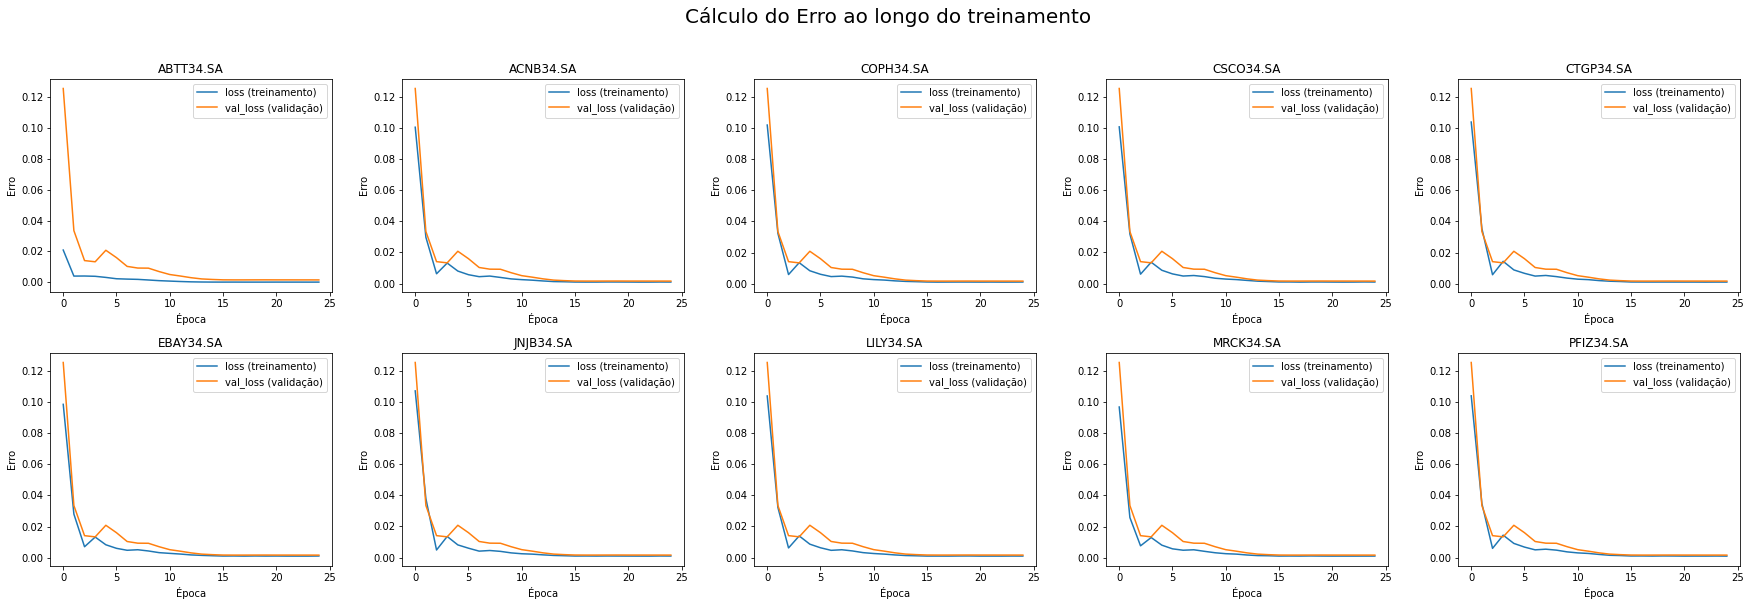

In [31]:
title="Cálculo do Erro ao longo do treinamento"

fig1, ax = plt.subplots(2,5,figsize=(25,9))
fig1.suptitle(title, y=0.95, fontsize=20)
fig1.tight_layout(pad=4)

cont=0;
for i in range(2):
  for j in range(5):
    ax[i][j].plot(historicos[cont].history['loss'])
    ax[i][j].plot(historico.history['val_loss'])
    ax[i][j].legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
    ax[i][j].set(xlabel='Época', ylabel='Erro')
    ax[i][j].title.set_text(selecao[cont])
    cont=cont+1

plt.show()

**Realização da Predição**

In [32]:
predicoes =[]
for i in range(len(selecao)):
  predicao = modelo.predict(x_testes[i])
  predicoes.append(predicao)

7/7 [==============================] - 0s 6ms/step


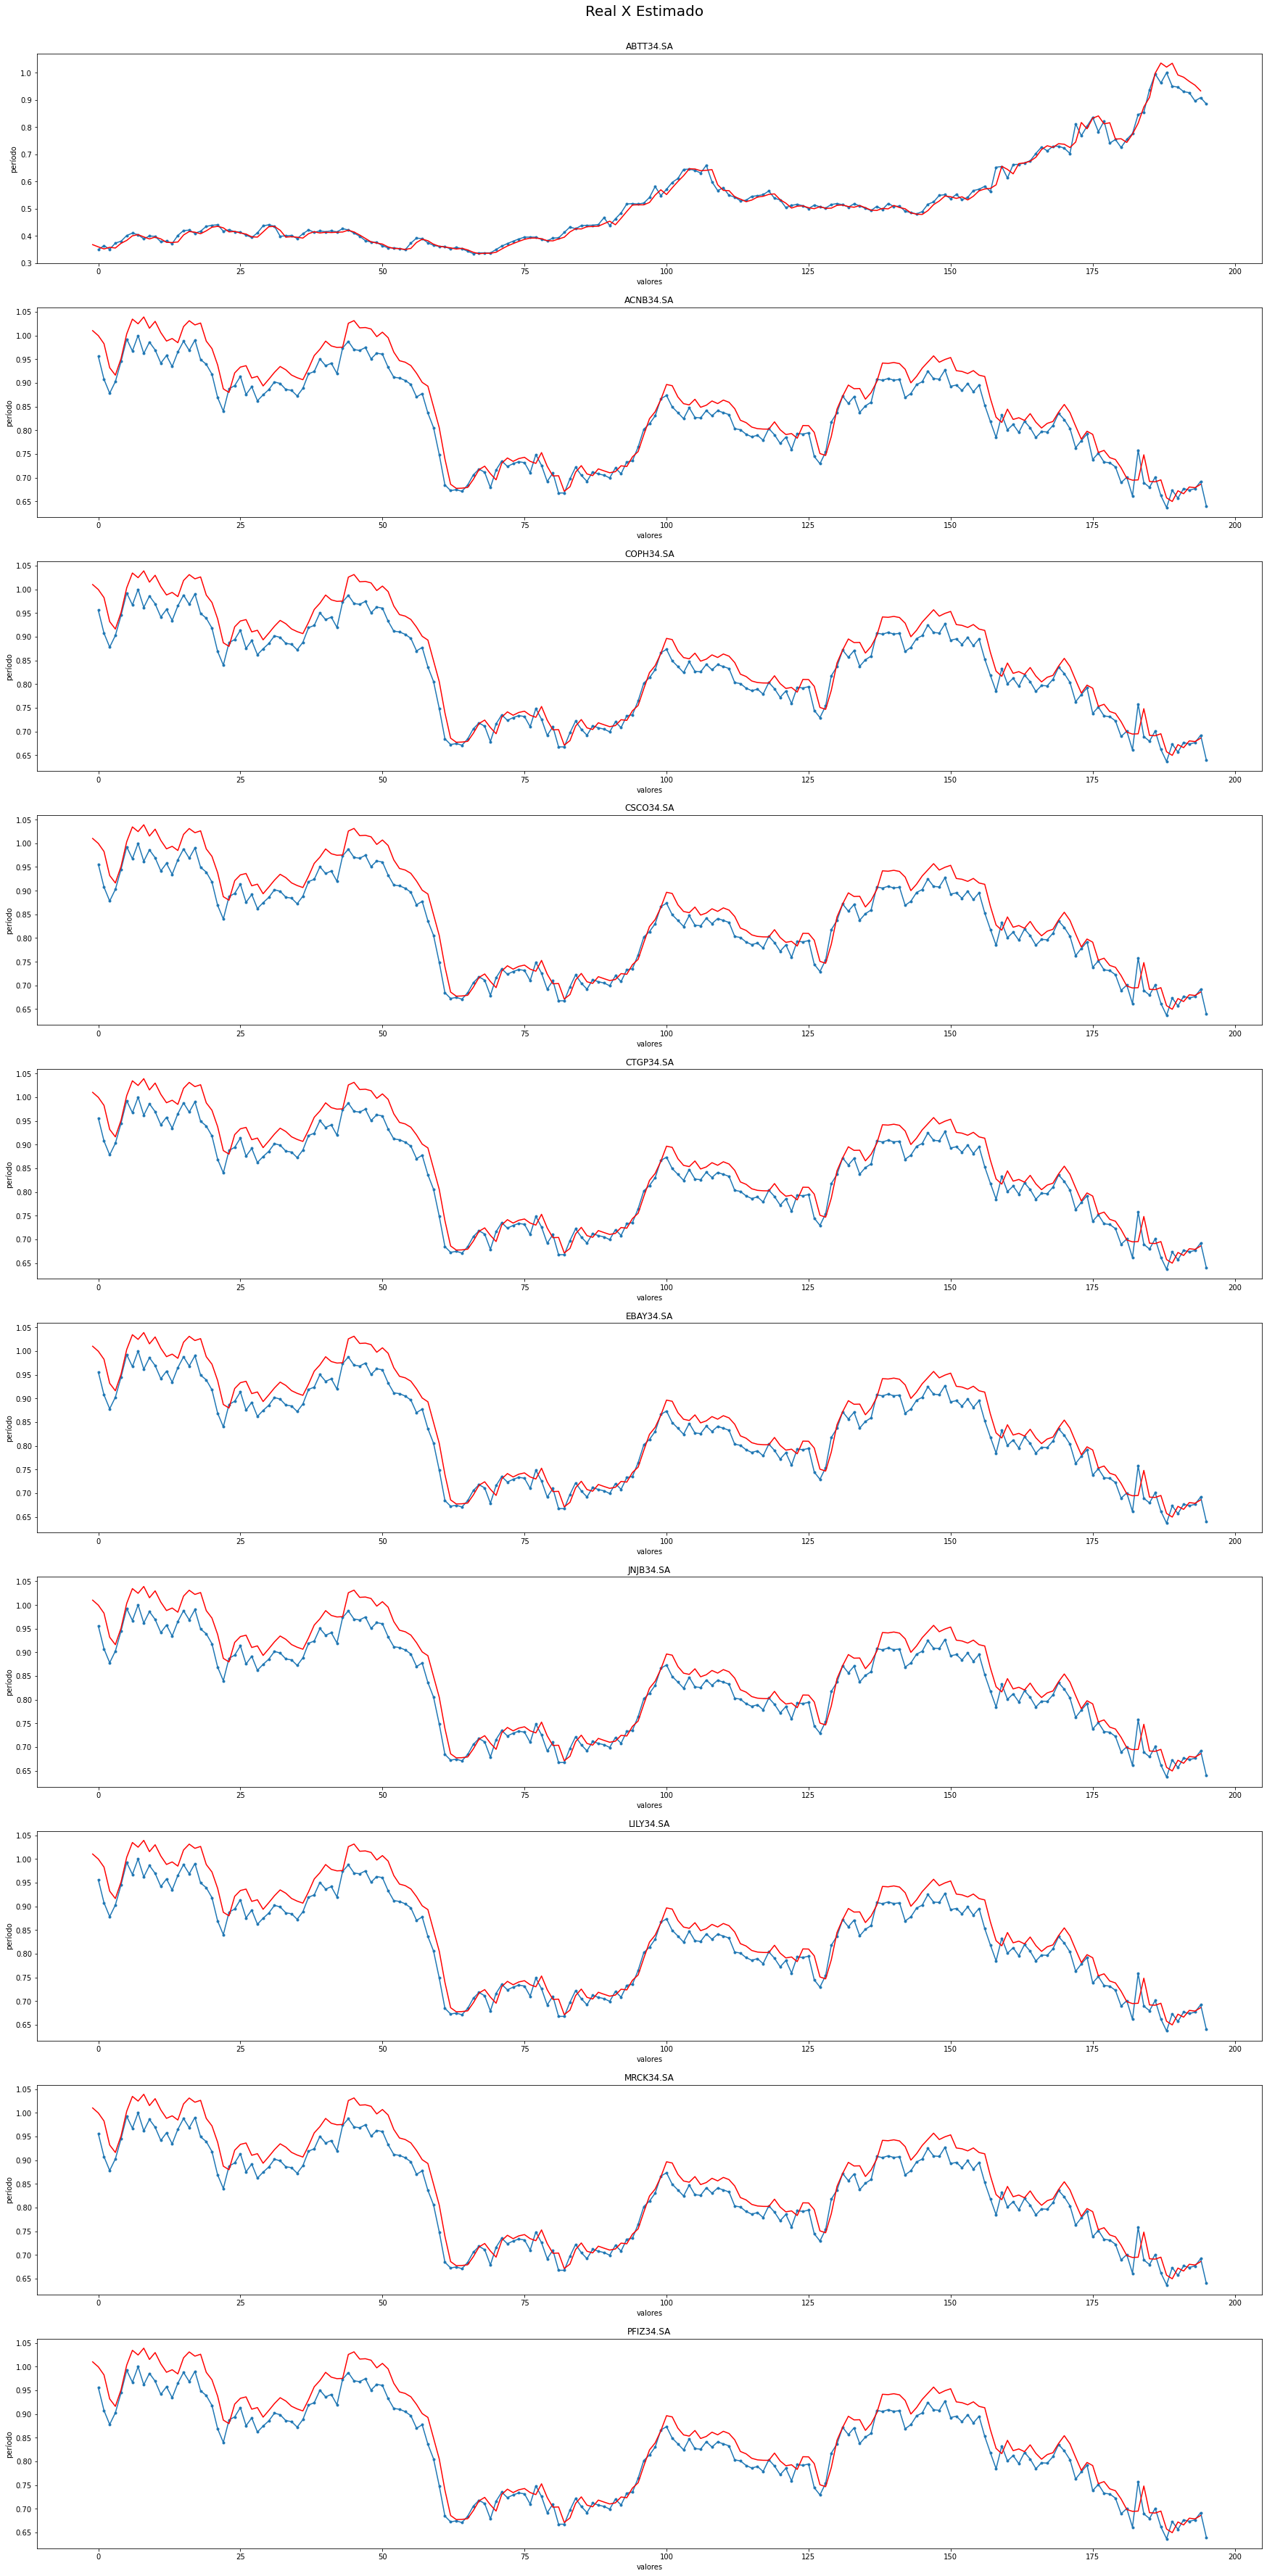

In [33]:
lst_dados_predicoes = []

title="Real X Estimado"

fig1, ax = plt.subplots(10,figsize=(25,50))
fig1.suptitle(title, y=0.99, fontsize=20)
fig1.tight_layout(pad=4)

for i in range(len(selecao)):
  look_back = 1
  valores_reais_y = y_testes[i]
  ax[i].plot(list(range(len(valores_reais_y))), 
          valores_reais_y, 
          marker='.', 
          label="Real")
  lst_dados_predicao=[w[0] for w in predicoes[i]]
  ax[i].plot(list(np.arange(len(predicoes[i]))-look_back), 
          lst_dados_predicao, 
          'r',label="Estimação do Modelo")
  ax[i].set(xlabel='valores', ylabel='período')
  ax[i].title.set_text(selecao[i])
  lst_dados_predicoes.append(lst_dados_predicao)

plt.show()

# **Fazendo Predições**

In [34]:
len(valores_reais_y)

196

In [35]:
len(lst_dados_predicao)

196

Acima foram conferidos se a quantidade de valores reais de y condizem com o quantidade de predições.

In [36]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.67660178],
       [0.69210886]])

In [37]:
minhas_predicoes = []

for i in range(len(selecao)):
  minha_predicao = modelos[i].predict([x_testes[i][n-1]])
  minhas_predicoes.append(minha_predicao)

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 835ms/step


1/1 [==============================] - 1s 820ms/step


1/1 [==============================] - 1s 817ms/step


1/1 [==============================] - 1s 803ms/step


1/1 [==============================] - 1s 785ms/step


1/1 [==============================] - 1s 805ms/step


1/1 [==============================] - 1s 812ms/step


1/1 [==============================] - 1s 828ms/step


1/1 [==============================] - 1s 826ms/step


In [38]:
selecao

['ABTT34.SA',
 'ACNB34.SA',
 'COPH34.SA',
 'CSCO34.SA',
 'CTGP34.SA',
 'EBAY34.SA',
 'JNJB34.SA',
 'LILY34.SA',
 'MRCK34.SA',
 'PFIZ34.SA']

In [39]:
for i in range(len(selecao)):
  print(f'Minha predição para {selecao[i]} é: {minhas_predicoes [i]}')

Minha predição para ABTT34.SA é: [[0.2931147 ]
 [0.29695284]]
Minha predição para ACNB34.SA é: [[0.2200367 ]
 [0.22431992]]
Minha predição para COPH34.SA é: [[0.21779656]
 [0.22202541]]
Minha predição para CSCO34.SA é: [[0.21761417]
 [0.2218402 ]]
Minha predição para CTGP34.SA é: [[0.2140629 ]
 [0.21822104]]
Minha predição para EBAY34.SA é: [[0.21928068]
 [0.22354054]]
Minha predição para JNJB34.SA é: [[0.21635666]
 [0.22057909]]
Minha predição para LILY34.SA é: [[0.22427507]
 [0.22858916]]
Minha predição para MRCK34.SA é: [[0.22003908]
 [0.2243412 ]]
Minha predição para PFIZ34.SA é: [[0.21623625]
 [0.2204291 ]]


# **Aplicação no Problema da Mochila**

**Instalação do Pacote Mip**

In [40]:
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 74.8 MB/s eta 0:00:00


Formulação do Modelo do problema da mochila (knapsack problem)

\begin{eqnarray}
\max \ 0.2940396\ x_{1} &+ 0.21799618\ x_{2}+0.21346179\ x_{3}+0.21773797\ x_{4}+0.21591215\ x_{5}+0.2214163 \ x_{6}+0.22004512\ x_{7}+0.21189724\ x_{8}+0.2193501\ x_{9}+0.2162143\ x_{10}\\
\mbox{sujeito a:}&  \\
 &\ x_{1} + \ x_{2}+\ x_{3}+\ x_{4}+\ x_{5}+\ x_{6}+\ x_{7}+\ x_{8}+\ x_{9}+\ x_{10} \leq 3  
\end{eqnarray}

Para aplicar no problema da mochila, foram escolhidas as predições para cada ativo na seleção (total de 10 ativos), tendo como restrição que, tendo como objetivo de otimização da carteira, seriam escolhidos apenas os 3 melhores ativos.

In [41]:
from mip import Model, maximize, CBC, BINARY, OptimizationStatus, xsum

In [42]:
coef_funcao_objetivo = [ 0.2940396, 0.21799618, 0.21346179, 0.21773797, 0.21591215, 0.2214163, 0.22004512, 0.21189724, 0.2193501, 0.2162143]
coef_restr = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
termo_independente =3 

In [43]:
I = range(len(coef_funcao_objetivo))
m = Model("knapsack")

In [44]:
x = [m.add_var(var_type=BINARY) for i in I]

In [45]:
m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))

In [46]:
m += xsum(coef_restr[i] * x[i] for i in I) <= termo_independente
print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões) e {m.num_nz} zero(s)')

O modelo tem 10 variável(eis), 1 restrição(ões) e 10 zero(s)


In [47]:
status = m.optimize(max_seconds=2)

In [48]:
status == OptimizationStatus.OPTIMAL

True

In [49]:
itens_selecionados = ["x"+str(i+1) for i in I if x[i].x >= 0.99]
print("Itens selecionados: {}".format(itens_selecionados))

Itens selecionados: ['x1', 'x6', 'x7']


In [50]:
print(f'Valor da solução ótima = {m.objective_value}')

Valor da solução ótima = 0.7355010200000001


Sendo assim, para a solução ótima ocorrer, deve-se selecionar os ativos referentes ao x1, x6 e x7 (ABTT34.SA, EBAY34.SA e JNJB34.SA), onde o valor da solução ótima será de aproximadamente 0.736.